In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
print ("Downloading my file")
f=open('/content/drive/My Drive/sentiment analysis/train.ft.txt','r')
dt=f.read()
f.close()

In [ ]:
#We can see there are total of 3600001 reviews in this dataset
len(dt.split('\n'))

3600001

In [ ]:
import re
dt=re.sub("__label__1 ",'0bhaiyu',dt)
dt=re.sub("__label__2 ",'1bhaiyu',dt)
dt=re.sub("\*"," ",dt)
dt=re.sub('\"'," ",dt)



In [ ]:
import nltk
nltk.download('stopwords')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
print(stopwords.words('english'))
stop_words = stopwords.words('english')

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:

dt=dt.lower()
ds=''
for i in dt.split("\n"):
  x=' '.join(ch for ch in i.split() if ch not in stop_words if len(ch)>2)
  ds+=x
  ds+=("\n")
print(ds[:500])

1bhaiyustuning even non-gamer: sound track beautiful! paints senery mind well would recomend even people hate vid. game music! played game chrono cross games ever played best music! backs away crude keyboarding takes fresher step grate guitars soulful orchestras. would impress anyone cares listen! ^_^
1bhaiyuthe best soundtrack ever anything.: i'm reading lot reviews saying best 'game soundtrack' figured i'd write review disagree bit. opinino yasunori mitsuda's ultimate masterpiece. music timele


In [ ]:
del dt
import string
exclude=string.punctuation
ds= ''.join(ch for ch in ds if ch not in exclude)
print(ds[:500])

1bhaiyustuning even nongamer sound track beautiful paints senery mind well would recomend even people hate vid game music played game chrono cross games ever played best music backs away crude keyboarding takes fresher step grate guitars soulful orchestras would impress anyone cares listen 
1bhaiyuthe best soundtrack ever anything im reading lot reviews saying best game soundtrack figured id write review disagree bit opinino yasunori mitsudas ultimate masterpiece music timeless im listening year


In [ ]:
import pandas as pd
a=open(r"/content/a.txt","w+",encoding='utf-8')
a.write(ds)
a.close()
df=pd.read_csv("/content/a.txt",delimiter='bhaiyu',names=['label','sentence'],engine='python', quotechar='"', error_bad_lines=False)
print(df.shape)
print(df[df["label"]==0].count())
print(df[:10])



(3600000, 2)
label       1800000
sentence    1799999
dtype: int64
   label                                           sentence
0      1  stuning even nongamer sound track beautiful pa...
1      1  the best soundtrack ever anything im reading l...
2      1  amazing soundtrack favorite music time hands d...
3      1  excellent soundtrack truly like soundtrack enj...
4      1  remember pull jaw floor hearing it played game...
5      1  an absolute masterpiece quite sure actually ta...
6      0  buyer beware selfpublished book want know whyr...
7      1  glorious story loved whisper wicked saints sto...
8      1  a five star book finished reading whisper wick...
9      1  whispers wicked saints easy read book made wan...


In [ ]:
print(df.tail())

         label                                           sentence
3599995      0  dont it high chair looks great first comes box...
3599996      0  looks nice low functionality used highchair ki...
3599997      0  compact hard clean small house really wanted t...
3599998      0  what saying sure book supposed be really rehas...
3599999      1  makes blood run redwhiteandblue agree every am...


In [ ]:
convert_dict = {'label': int, 
                'sentence': str
               } 
  
df = df.astype(convert_dict)

In [ ]:
from sklearn.model_selection import train_test_split
sentences=df['sentence'].values
y=df['label'].values
sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, test_size=0.25, random_state=7)


In [ ]:
print(sentences_train.shape)
print(y_train.shape)
print(y_test.shape)

(2700000,)
(2700000,)
(900000,)


In [ ]:
#from keras.utils import np_utils
#for  i in range(len(y_train)):
#  y_train[i] = np_utils.to_categorical(y_train[i], 2)
#y_test = np_utils.to_categorical(y_test,2)

In [ ]:
sentences_train_processed=[]
for i in sentences_train:
  sentences_train_processed.append(str(i).split())
print(sentences_train_processed[:5])



[['new', 'tool', 'amazing', 'tool', 'replaced', 'screew', 'driver', 'epa', 'think', 'next', 'homelite', 'probably', 'got', 'kind', 'reward', 'this'], ['v', 'expensive', 'feel', 'gr8', 'shower', 'nice', 'aroma', 'smooth', 'textureid', 'wish', 'little', 'cheaperfew', 'variations', 'need', 'introduced', 'soon'], ['good', 'areas', 'leaves', 'necessare', 'steps', 'thought', 'going', 'love', 'book', 'started', 'great', 'tutorials', 'happy', 'lark', 'came', 'importing', 'bargifs', 'assigning', 'individual', 'urls', 'putting', 'label', 'hotspotwhich', 'showed', 'butit', 'leaves', 'instructions', 'label', 'hot', 'spot', 'person', 'cruising', 'web', 'idea', 'link', 'leads', 'to', 'fact', 'may', 'know', 'link', 'since', 'bargif', 'appears', 'blank', 'hold', 'cursor', 'get', 'underlying', 'linktoo', 'much', 'helpful', 'either', 'newcomers', 'intermediate', 'it', 'give', 'html', 'alternative', 'link', 'area', 'link', 'showing', 'label'], ['nasty', 'movie', 'watching', 'croaching', 'tiger', 'hidden'

In [ ]:
#Run the following 2 code blocks just for the first time to generate the embeddings and save the embeddings for later use
#Or just download the word embeddings for training your model
'''
from gensim.models import Word2Vec
model_vec_train = Word2Vec(sentences=sentences_train_processed, size=300, window=5, min_count=20, workers=4, sg=0)
'''

'\nfrom gensim.models import Word2Vec\nmodel_vec_train = Word2Vec(sentences=sentences_train_processed, size=300, window=5, min_count=20, workers=4, sg=0)\n'

In [ ]:
'''
words = list(model_vec_train.wv.vocab)
print('Vocabulary size: %d' % len(words))
filename = 'final_embedding_word2vec.txt'
model_vec_train.wv.save_word2vec_format(filename, binary=False)
#del model_vec_train
'''

"\nwords = list(model_vec_train.wv.vocab)\nprint('Vocabulary size: %d' % len(words))\nfilename = 'final_embedding_word2vec.txt'\nmodel_vec_train.wv.save_word2vec_format(filename, binary=False)\n#del model_vec_train\n"

In [ ]:
#convert the word embeddings into a list of strings so that it can be processed by keras Tokenizer
document_train=[]
for i in sentences_train_processed:
  token=' '.join(i)
  document_train.append(token)

In [ ]:
print(document_train[:1])
print(document_train[1:2])

['new tool amazing tool replaced screew driver epa think next homelite probably got kind reward this']
['v expensive feel gr8 shower nice aroma smooth textureid wish little cheaperfew variations need introduced soon']


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer=Tokenizer()
# fit the tokenizer only on train data
tokenizer.fit_on_texts(document_train)
encoded_docs = tokenizer.texts_to_sequences(document_train)
print(encoded_docs[:2])

[[27, 640, 250, 640, 992, 365743, 2192, 32027, 33, 181, 47005, 206, 41, 278, 7482, 61], [25865, 547, 128, 22122, 1764, 91, 8974, 1219, 565134, 230, 28, 565135, 5743, 84, 2432, 555]]


In [ ]:
print(tokenizer.word_index['bad'])

44


In [ ]:
import numpy as np
# We will use the max length of a sentence as the length of 99 percentile, just leaving the 1% longest sentences
x = [len(s) for s in encoded_docs]

median_len = np.percentile(x,99)
median_len


95.0

In [ ]:
print(max(x))

157


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

X_train = pad_sequences(encoded_docs, maxlen=int(median_len), padding='post')
print(X_train.shape)
print(X_train[:2])

(2700000, 95)
[[    27    640    250    640    992 365743   2192  32027     33    181
   47005    206     41    278   7482     61      0      0      0      0
       0      0      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0      0      0      0
       0      0      0      0      0]
 [ 25865    547    128  22122   1764     91   8974   1219 565134    230
      28 565135   5743     84   2432    555      0      0      0      0
       0      0      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0      0      0      0
       0    

In [ ]:
encoded_docs = tokenizer.texts_to_sequences(sentences_test)
X_test = pad_sequences(encoded_docs, maxlen=int(median_len), padding='post')
print(X_test.shape)
print(X_test[:2])

(900000, 95)
[[ 31967   1388 111275   3597    217    845    459   1388    245  31967
    1422    245      5    784   7424   2623   7416   3630    902      7
    1392    245    525  12325    219     87   1407      0      0      0
       0      0      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0      0      0      0
       0      0      0      0      0]
 [   738     80     10   2566   1229   3163    175    115    234   5897
     109    998    131     73      7    451   1736      2    174   1420
   20207    119     64    360 248833   1269    127   1772    281    611
   15999    786    306     79   1697    288     84   1086    148    752
   10316     

In [ ]:
print(type(tokenizer.word_index))
print(len(tokenizer.word_index)+1)

<class 'dict'>
1864537


In [ ]:
from numpy import asarray,zeros
def load_embedding(filename):
	# load embedding into memory
	file = open(filename,'r')
	lines = file.readlines()[1:] #leave the first line as it just contain the shape of the embedding file
	file.close()
	embedding = dict()     # create a map of words to vectors
	for line in lines:
		parts = line.split()
		# key is string word, value is numpy array for vector
		embedding[parts[0]] = asarray(parts[1:], dtype='float32')
	return embedding
def get_weight_matrix(embedding, vocab):
	# total vocabulary size plus 0 for unknown words
	vocab_size = len(vocab) + 1
	# define weight matrix dimensions with all 0
	weight_matrix = zeros((vocab_size, 300))
	# step vocab, store vectors using the Tokenizer's integer mapping
	for word, i in vocab.items():
		vector = embedding.get(word)
		if vector is not None:
			weight_matrix[i] = vector
	return weight_matrix

In [ ]:
from tensorflow.keras.layers import Embedding
from numpy import asarray,zeros
vocab_size=len(tokenizer.word_index)+1
raw_embedding = load_embedding(r'/content/drive/My Drive/sentiment analysis/final_embedding_word2vec.txt')
embedding_vectors = get_weight_matrix(raw_embedding, tokenizer.word_index)  
print(embedding_vectors.shape)                                                    #EMBEDDING LAYER
print(embedding_vectors[1:3])
embedding_layer = Embedding(vocab_size, 300,weights=[embedding_vectors] ,input_length=int(median_len), trainable=False)      

(1864537, 300)
[[ 2.78162503e+00 -1.23020840e+00 -1.91693282e+00  2.27031255e+00
  -6.66806102e-02  1.05085230e+00 -1.12982130e+00 -2.46624851e+00
   4.05526549e-01  1.31214571e+00  9.47492778e-01 -1.29186058e+00
   1.10378766e+00  1.81520486e+00  1.05795312e+00  2.71973872e+00
  -1.83133924e+00 -5.91763973e-01  2.51992419e-03  4.97108459e-01
  -2.07112503e+00  2.10744786e+00  4.56704289e-01  1.84271383e+00
   8.97395849e-01 -3.31875682e-01 -6.31278992e-01  2.81734705e-01
  -1.10634768e+00  6.54566467e-01  2.10952878e+00 -2.23705482e+00
   1.54453829e-01  4.49377209e-01 -5.13899803e-01  2.02528763e+00
  -1.08952260e+00  3.00711036e-01 -2.64443517e-01  1.42338857e-01
   6.75817251e-01 -8.57305169e-01 -2.55608171e-01 -1.15480065e+00
  -3.89501303e-01 -1.61234844e+00  2.26973519e-01  2.53405929e+00
  -1.47954667e+00 -1.00571787e+00 -7.70273745e-01  6.99877501e-01
   3.17098379e-01  1.96418834e+00 -4.41594511e-01 -7.37462997e-01
  -1.56944489e+00 -9.06462222e-02  5.36261737e-01  8.22641015

In [ ]:
del sentences_train
del sentences_train_processed
del sentences_test
del df
del ds
del document_train

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Embedding,GlobalMaxPooling1D
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D

model = Sequential()
model.add(embedding_layer)
#model.add(Conv1D(filters=200 ,kernel_size=2, activation='relu'))
#model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=200, kernel_size=5, activation='relu',padding='valid'))
model.add(GlobalMaxPooling1D())
#model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(.2))
model.add(Dense(50, activation='relu'))
model.add(Dropout(.1))
model.add(Dense(1, activation='sigmoid'))
print(model.summary())



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 95, 300)           559361100 
_________________________________________________________________
conv1d (Conv1D)              (None, 91, 200)           300200    
_________________________________________________________________
global_max_pooling1d (Global (None, 200)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               51456     
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                12850     
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
cp = ModelCheckpoint(filepath='content\sentiment_weights',save_weights_only=True,save_best_only=True,verbose=1)
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=5)

history=model.fit(X_train, y_train,validation_split=.25 ,epochs=100,batch_size=32, verbose=1,callbacks=[es,cp])

Epoch 1/100
63282/63282 [==============================] - ETA: 0s - loss: 0.2468 - accuracy: 0.8993
Epoch 00001: val_loss improved from inf to 0.21711, saving model to content\sentiment_weights
63282/63282 [==============================] - 329s 5ms/step - loss: 0.2468 - accuracy: 0.8993 - val_loss: 0.2171 - val_accuracy: 0.9125
Epoch 2/100
63270/63282 [============================>.] - ETA: 0s - loss: 0.2070 - accuracy: 0.9180
Epoch 00002: val_loss improved from 0.21711 to 0.20571, saving model to content\sentiment_weights
63282/63282 [==============================] - 328s 5ms/step - loss: 0.2071 - accuracy: 0.9180 - val_loss: 0.2057 - val_accuracy: 0.9177
Epoch 3/100
63272/63282 [============================>.] - ETA: 0s - loss: 0.1904 - accuracy: 0.9254
Epoch 00003: val_loss improved from 0.20571 to 0.20346, saving model to content\sentiment_weights
63282/63282 [==============================] - 327s 5ms/step - loss: 0.1904 - accuracy: 0.9254 - val_loss: 0.2035 - val_accuracy: 0.9

In [34]:
#model is being evaluated for training dataset 
loss, acc = model.evaluate(X_train, y_train, verbose=1)
print('Train Accuracy: %f' % (acc*100))
#model is being evaluated for testing datset
loss, acc = model.evaluate(X_test, y_test, verbose=1)
print('Test Accuracy: %f' % (acc*100))

84375/84375 [==============================] - 210s 2ms/step - loss: 0.1371 - accuracy: 0.9517
Train Accuracy: 95.165706
28125/28125 [==============================] - 69s 2ms/step - loss: 0.2312 - accuracy: 0.9185
Test Accuracy: 91.850334


In [35]:
from sklearn.metrics import confusion_matrix, classification_report
#perform prediction on test data and compare it with original sentiment
y_pred = model.predict(X_test)


In [36]:
y_p = []
for p in y_pred:
  if p>0.5:
    y_p.append(1)
  else:
    y_p.append(0)
print(confusion_matrix(y_p,y_test))
print(classification_report(y_p,y_test))

[[417015  40259]
 [ 33088 409638]]
              precision    recall  f1-score   support

           0       0.93      0.91      0.92    457274
           1       0.91      0.93      0.92    442726

    accuracy                           0.92    900000
   macro avg       0.92      0.92      0.92    900000
weighted avg       0.92      0.92      0.92    900000



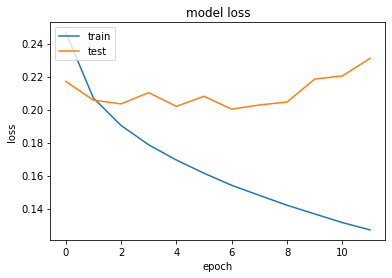

In [37]:
import matplotlib.pyplot as plt

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [38]:
a=['good best excellent ','bad worse worst','dog good great bad ']
encoded_a = tokenizer.texts_to_sequences(a)
#max_length = int(sum([len(s.split()) for s in document_train])/len(document_train))
a_test = pad_sequences(encoded_a, maxlen=int(median_len), padding='post')
print(model.predict(a_test))

[[9.9905187e-01]
 [5.7470760e-07]
 [8.5974425e-01]]


In [39]:
#a=['good best excellent ','bad worse worst','dog good great bad ']
a=int(input("Enter the number of reviews:"))
s=[]
for i in range(a):
  s.append(input("Enter review->:"))
encoded_s = tokenizer.texts_to_sequences(s)
#max_length = int(sum([len(s.split()) for s in document_train])/len(document_train))
s_test = pad_sequences(encoded_s, maxlen=int(median_len), padding='post')
for i in range(a):
  if model.predict(s_test[i:i+1])>0.5:
    print("Product recommended!")
  else:
    print("Product is not recommended")

Enter the number of reviews:3
Enter review->:The food was good not bad at all
Enter review->:The food was bad, not good at all
Enter review->:Just buy it
Product recommended!
Product is not recommended
Product is not recommended
